# Data Processing

In this section we go over handling DAS data snippets. Filtering and plotting them.

## Trimming Data

Trimming data in time and space (channels).

In [5]:
from lightguide.client import ExampleData


# This will download example data
blast = ExampleData.earthquake()

blast.trim_channels(begin=100, end=50)
blast.trim_time(begin=10.0);

## Frequency Filtering

De-noising an particularly noisy DAS data set. These operation are applied in-place.
 
The regional earthquake was recorded in an ICDP borehole in Landwüst, Germany. The fibre is interrogated by a Silixa iDAS v2 and is cemented behind the casing.

In [6]:
blast.lowpass(cutoff_freq=70.0)
blast.highpass(cutoff_freq=70.0)
blast.bandpass(min_freq=10.0, max_freq=60.0);

## Adaptive Frequency Filtering

De-noising using the adaptive frequency filter (AFK)

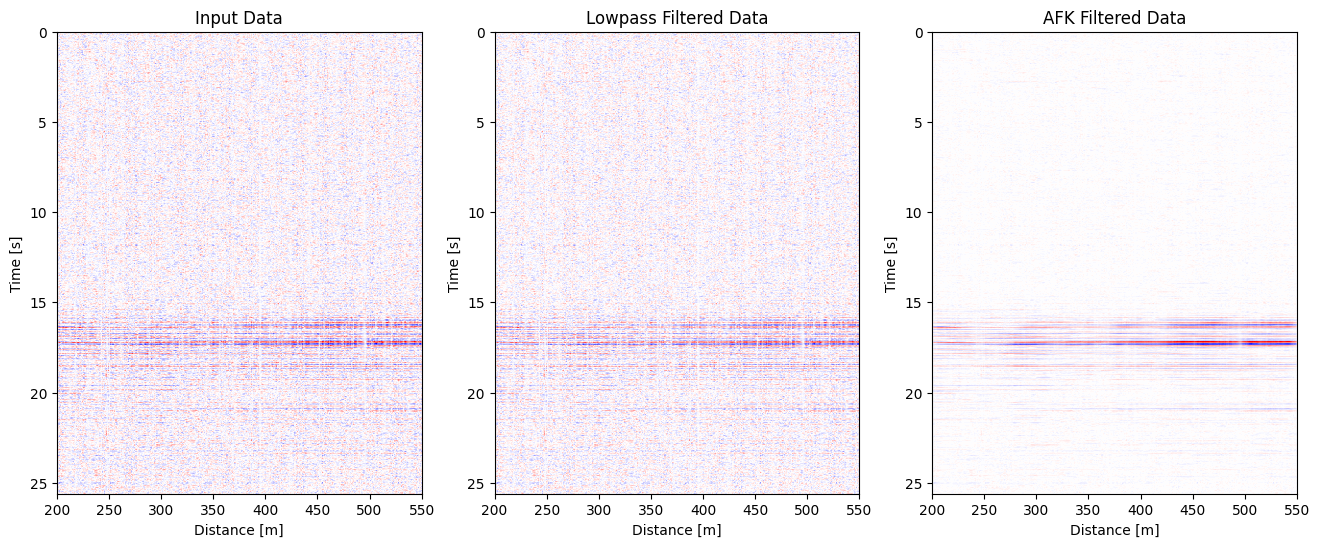

In [11]:
import matplotlib.pyplot as plt

blast = ExampleData.earthquake()

blast = blast.trim_channels(begin=200, end=550)

blast_afk = blast.copy()
blast_afk.afk_filter(exponent=0.8)

blast_lp = blast.copy()
blast_lp.lowpass(cutoff_freq=70.)


fig, axes = plt.subplots(1, 3, figsize=(16, 6))

ax = axes[0]
ax.set_title("Input Data")
blast.plot(ax)

ax = axes[1]
ax.set_title("Lowpass Filtered Data")
blast_lp.plot(ax)

ax = axes[2]
ax.set_title("AFK Filtered Data")
blast_afk.plot(ax);